In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [4]:
#인증키
key = 

In [5]:
url = 'http://openAPI.seoul.go.kr:8088/'+key+'/json/ListSnowRemoveBox/1/1000/'
url2= "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/1001/2000/"
url3 = "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/2001/3000/"
url4 = "http://openAPI.seoul.go.kr:8088/"+key+"/json/ListSnowRemoveBox/3001/3590/"
#1000까지는 긁어지는데 1500은안됨 for문으로 만들어줘서 크롤링한다. 

In [6]:
response = requests.get(url)
urlLst =[url, url2,url3, url4]

In [7]:
response.status_code # 성공 404 나 다르게 나오면 error

200

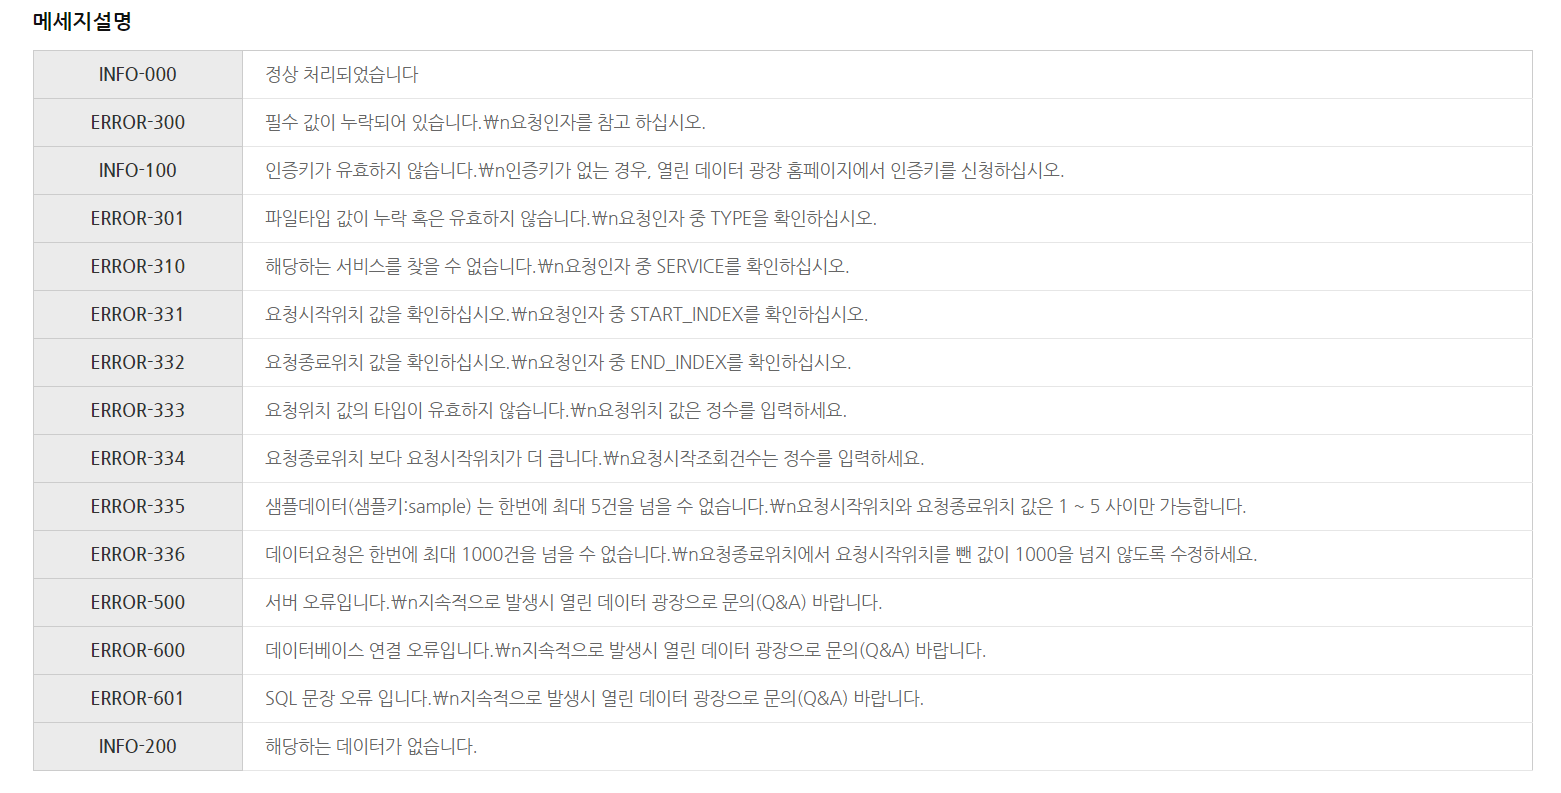

In [8]:
response.json()

{'ListSnowRemoveBox': {'list_total_count': 3855,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'G2_ID': 1.0,
    'SBOX_NUM': '동부-001',
    'MGC_NM': '동부도로',
    'DETL_CN': '종합운동장분기점 (한남)',
    'RM': '올림픽대로',
    'G2_XMIN': 206851.4,
    'G2_YMIN': 546455.3,
    'G2_XMAX': 206851.4,
    'G2_YMAX': 546455.3},
   {'G2_ID': 2.0,
    'SBOX_NUM': '동부-002',
    'MGC_NM': '동부도로',
    'DETL_CN': '청담1교 직전 (하남)',
    'RM': '올림픽대로',
    'G2_XMIN': 205725.8,
    'G2_YMIN': 546722.6,
    'G2_XMAX': 205725.8,
    'G2_YMAX': 546722.6},
   {'G2_ID': 3.0,
    'SBOX_NUM': '동부-003',
    'MGC_NM': '동부도로',
    'DETL_CN': '천호대교 남단 UP램프',
    'RM': '천호대교',
    'G2_XMIN': 210496.4,
    'G2_YMIN': 549203.2,
    'G2_XMAX': 210496.4,
    'G2_YMAX': 549203.2},
   {'G2_ID': 4.0,
    'SBOX_NUM': '동부-004',
    'MGC_NM': '동부도로',
    'DETL_CN': '올림픽대교 남단',
    'RM': '올림픽대교',
    'G2_XMIN': 209532.3,
    'G2_YMIN': 547879.1,
    'G2_XMAX': 209532.3,
    'G2_YMAX': 547879.1},
   {'G2_ID': 5.0,
   

In [27]:
snowbox_dict = response.json()

In [28]:
type(snowbox_dict)

dict

In [29]:
print('dict keys : ',snowbox_dict.keys())

dict keys :  dict_keys(['ListSnowRemoveBox'])


In [30]:
snowbox_dict['ListSnowRemoveBox'].keys()

dict_keys(['list_total_count', 'RESULT', 'row'])

## response.json() 구조
* dict 타입으로 되어 있음
* key : ListSnowRemoveBox
* items : 또 하나의 dict 타입이 ListSnowRemoveBox의 item으로 들어있음
* 하위의 key : 'list_total_count', 'RESULT', 'row'
    * list_total_count : 총 데이터의 개수를 알려줌
    * RESULT : 데이터를 잘 가져왔는지 알려줌
    * row : 필요한 데이터

In [31]:
#총 데이터의 개수
snowbox_dict['ListSnowRemoveBox']['list_total_count']

3855

In [32]:
#데이터를 잘 가져왔는지 알려줌
snowbox_dict['ListSnowRemoveBox']['RESULT']

{'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}

In [33]:
#data
snowbox_dict['ListSnowRemoveBox']['row']

[{'G2_ID': 1.0,
  'SBOX_NUM': '동부-001',
  'MGC_NM': '동부도로',
  'DETL_CN': '종합운동장분기점 (한남)',
  'RM': '올림픽대로',
  'G2_XMIN': 206851.4,
  'G2_YMIN': 546455.3,
  'G2_XMAX': 206851.4,
  'G2_YMAX': 546455.3},
 {'G2_ID': 2.0,
  'SBOX_NUM': '동부-002',
  'MGC_NM': '동부도로',
  'DETL_CN': '청담1교 직전 (하남)',
  'RM': '올림픽대로',
  'G2_XMIN': 205725.8,
  'G2_YMIN': 546722.6,
  'G2_XMAX': 205725.8,
  'G2_YMAX': 546722.6},
 {'G2_ID': 3.0,
  'SBOX_NUM': '동부-003',
  'MGC_NM': '동부도로',
  'DETL_CN': '천호대교 남단 UP램프',
  'RM': '천호대교',
  'G2_XMIN': 210496.4,
  'G2_YMIN': 549203.2,
  'G2_XMAX': 210496.4,
  'G2_YMAX': 549203.2},
 {'G2_ID': 4.0,
  'SBOX_NUM': '동부-004',
  'MGC_NM': '동부도로',
  'DETL_CN': '올림픽대교 남단',
  'RM': '올림픽대교',
  'G2_XMIN': 209532.3,
  'G2_YMIN': 547879.1,
  'G2_XMAX': 209532.3,
  'G2_YMAX': 547879.1},
 {'G2_ID': 5.0,
  'SBOX_NUM': '동부-005',
  'MGC_NM': '동부도로',
  'DETL_CN': '올림픽대교 북단 UP램프',
  'RM': '올림픽대교',
  'G2_XMIN': 208708.1,
  'G2_YMIN': 548541.2,
  'G2_XMAX': 208708.1,
  'G2_YMAX': 548541.2},
 {'G2_ID

In [34]:
snowbox = snowbox_dict['ListSnowRemoveBox']['row']

###### dictionary의 keys를 list로 뽑고 싶으면 [*dict] 하면 된다!

In [44]:
snowbox_dt = pd.DataFrame(columns=[*snowbox[0]]) #dictionary keys -> list
snowbox_dt

,G2_ID,SBOX_NUM,MGC_NM,DETL_CN,RM,G2_XMIN,G2_YMIN,G2_XMAX,G2_YMAX


In [49]:
[*snowbox[0]]

['G2_ID',
 'SBOX_NUM',
 'MGC_NM',
 'DETL_CN',
 'RM',
 'G2_XMIN',
 'G2_YMIN',
 'G2_XMAX',
 'G2_YMAX']

In [51]:
for column in [*snowbox[0]] :
    snowbox_dt[column] = [x[column] for x in snowbox]

In [52]:
snowbox_dt

,G2_ID,SBOX_NUM,MGC_NM,DETL_CN,RM,G2_XMIN,G2_YMIN,G2_XMAX,G2_YMAX
0,1.0,동부-001,동부도로,종합운동장분기점 (한남),올림픽대로,206851.4,546455.3,206851.4,546455.3
1,2.0,동부-002,동부도로,청담1교 직전 (하남),올림픽대로,205725.8,546722.6,205725.8,546722.6
2,3.0,동부-003,동부도로,천호대교 남단 UP램프,천호대교,210496.4,549203.2,210496.4,549203.2
3,4.0,동부-004,동부도로,올림픽대교 남단,올림픽대교,209532.3,547879.1,209532.3,547879.1
4,5.0,동부-005,동부도로,올림픽대교 북단 UP램프,올림픽대교,208708.1,548541.2,208708.1,548541.2
5,6.0,동부-006,동부도로,잠실대교 북단 UP램프,잠실대교,207675.5,547586.3,207675.5,547586.3
6,7.0,동부-007,동부도로,잠실대교 남단 UP램프,잠실대교,208548.0,546815.1,208548.0,546815.1
7,8.0,동부-008,동부도로,잠실대교 남단,잠실대교,208343.0,546776.7,208343.0,546776.7
8,9.0,동부-009,동부도로,남단 올림픽대로 진입램프,구리암사대교,211921.6,551780.5,211921.6,551780.5
9,10.0,동부-010,동부도로,올림픽대로 분기점,구리암사대교,212051.5,551919.8,212051.5,551919.8
